##1. Import Dependencies.



In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##2. Load the Dataset.

In [198]:
ratings = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")
movies = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")

In [199]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [200]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##3. Explore your Data.

In [201]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


##4. Ratings Distribution.

<ipython-input-202-c95e94b7b418>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating',data=ratings, palette='husl')


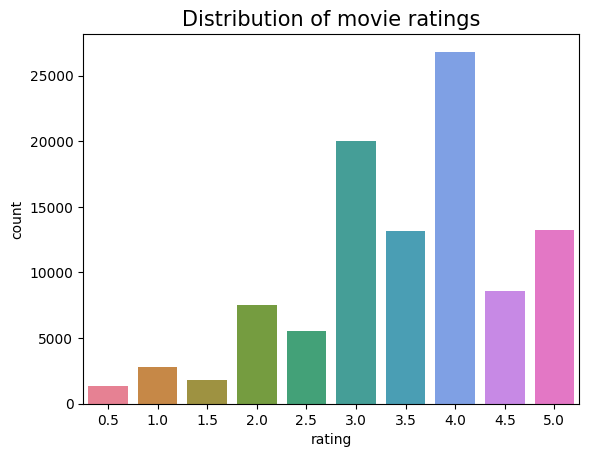

In [202]:
sns.countplot(x='rating',data=ratings, palette='husl')
plt.title("Distribution of movie ratings", fontsize=15)
plt.show()

In [203]:
print(f"Mean global ratings: {round(ratings['rating'].mean(),2)}.")

Mean global ratings: 3.5.


In [204]:
mean_ratings = ratings.groupby('userId')['rating'].mean()
print(f"Mean ratings per user: {round(mean_ratings.mean(),2)}.")

Mean ratings per user: 3.66.


In [205]:
mean_ratings_per_movie = ratings.groupby('movieId')['rating'].mean()
print(f"Mean ratings per movie: {round(mean_ratings_per_movie.mean(),2)}.")

Mean ratings per movie: 3.26.


##5.Which movies are most frequently rated.

In [206]:
ratings['movieId'].value_counts()

,count
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
86279,1
86922,1
5962,1


In [207]:
movie_ratings = ratings.merge(movies, on='movieId')
movie_ratings['title'].value_counts()[0:20]

,count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Braveheart (1995),237
Terminator 2: Judgment Day (1991),224


##6. What are the lowest and highest rated movies.

###6.1. Lowest rated movie.

In [208]:
mean_ratings = ratings.groupby('movieId')[['rating']].mean()
lowest_rated  =mean_ratings['rating'].idxmin()


movies[movies['movieId'] == lowest_rated]

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


###6.2. Highest rated movie.

In [209]:
mean_ratings = ratings.groupby('movieId')[['rating']].mean()
highest_rated = mean_ratings['rating'].idxmax()

movies[movies['movieId'] == highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


####6.2.1. Lets dig deeper.
**Bayesian Average**
* Bayesian Average is defined as:

     *r1* = (C * *m*) + sum(reviews) / C + N

     where:
     * C -> Dataset size.
     * *m* -> average ratings



In [210]:
movie_stats = ratings.groupby('movieId')['rating'].agg(['count','mean'])
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings per given movie: {C:.2f}.")
print(f"Average rating for a single movie: {m:.2f}")

Average number of ratings per given movie: 10.37.
Average rating for a single movie: 3.26


In [211]:
def bayesian_avg(ratings):
  bayesian_avg = ((C * m) + (ratings.sum())) / (C + (ratings.count()))

  return round(bayesian_avg, 3)



In [212]:
lamerica = pd.Series([5,5])
bayesian_avg(lamerica)

3.543

In [213]:
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId','bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')
movie_stats

,movieId,count,mean,bayesian_avg
0,1,215,3.920930,3.891
1,2,110,3.431818,3.417
2,3,52,3.259615,3.260
3,4,7,2.357143,2.898
4,5,49,3.071429,3.105
...,...,...,...,...
9719,193581,1,4.000000,3.327
9720,193583,1,3.500000,3.283
9721,193585,1,3.500000,3.283
9722,193587,1,3.500000,3.283


In [214]:
movie_stats = movie_stats.merge(movies[['movieId', 'title']])
movie_stats.sort_values(by='bayesian_avg', ascending=False)[0:5]

,movieId,count,mean,bayesian_avg,title
277,318,317,4.429022,4.392,"Shawshank Redemption, The (1994)"
659,858,192,4.289062,4.236,"Godfather, The (1972)"
2224,2959,218,4.272936,4.227,Fight Club (1999)
224,260,251,4.231076,4.193,Star Wars: Episode IV - A New Hope (1977)
46,50,204,4.237745,4.191,"Usual Suspects, The (1995)"


##7. Data cleaning.

In [215]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [216]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


##8. How many movie genres are there

In [217]:
from collections import Counter
genre_frequency = Counter(e for genres in movies['genres'] for e in genres)

print(f"There are {len(genre_frequency)} genres.")
print(f"The 5 most common genres are: {genre_frequency.most_common(5)}")
genre_frequency

There are 20 genres.
The 5 most common genres are: [('Drama', 4361), ('Comedy', 3756), ('Thriller', 1894), ('Action', 1828), ('Romance', 1596)]


Counter({'Adventure': 1263,
         'Animation': 611,
         'Children': 664,
         'Comedy': 3756,
         'Fantasy': 779,
         'Romance': 1596,
         'Drama': 4361,
         'Action': 1828,
         'Crime': 1199,
         'Thriller': 1894,
         'Horror': 978,
         'Mystery': 573,
         'Sci-Fi': 980,
         'War': 382,
         'Musical': 334,
         'Documentary': 440,
         'IMAX': 158,
         'Western': 167,
         'Film-Noir': 87,
         '(no genres listed)': 34})

###8.1. Let's Plot the Genre Frequency to get a better idea

<ipython-input-218-b018ff99fc2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'genre', y='count',data=genre_frequency_df.sort_values(by='count',ascending=False),palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Children'),
  Text(11, 0, 'Animation'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Documentary'),
  Text(14, 0, 'War'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'IMAX'),
  Text(18, 0, 'Film-Noir'),
  Text(19, 0, '(no genres listed)')])

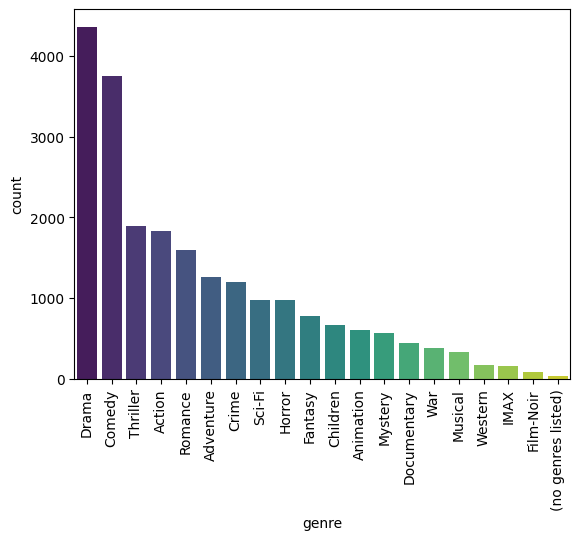

In [218]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre','count']

sns.barplot(x = 'genre', y='count',data=genre_frequency_df.sort_values(by='count',ascending=False),palette='viridis')
plt.xticks(rotation=90)

##9. Data Preprocessing.

In [219]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.

    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)

    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

In [220]:
X.shape
#user_mapper

(610, 9724)

##10. Checking for sparcity.
* Sparcity is the property of being scanty or scattered; lacking denseness.

* Anything above 1% is okay but below 1% then we consider content based filtering.

In [221]:
n_total = X.shape[0] * X.shape[1]
n_ratings = X.nnz
sparcity = n_ratings / n_total
print(f"Matrix sparcity: {round(sparcity*100,2)}% . ")

Matrix sparcity: 1.7% . 


`csr_matrix.nn` counts the stored values in our sparse matrix. The rest of the cells are empty.

The `cold start problem` is when there are new users and movies that do not have ratings. In our Movies Dataset all movies have at least one rating but in general it's useful to check which users and movies have few interactions.

In [222]:
n_ratings_per_user = X.getnnz(axis=1)
print(f"Number of ratings per user: {len(n_ratings_per_user)}.")

Number of ratings per user: 610.


In [223]:
n_ratings_per_movie = X.getnnz(axis=0)
print(f"Number of ratings per movie: {len(n_ratings_per_movie)}.")

Number of ratings per movie: 9724.


In [224]:
print(f"The most rated movie has: {n_ratings_per_movie.max()} ratings")
print(f"The least rated movie has: {n_ratings_per_movie.min()} ratings")

The most rated movie has: 329 ratings
The least rated movie has: 1 ratings


In [225]:
print(f"Most active user has rated: {n_ratings_per_user.max()} movies.")
print(f"Least active user has rated: {n_ratings_per_user.min()} movies.")

Most active user has rated: 2698 movies.
Least active user has rated: 20 movies.


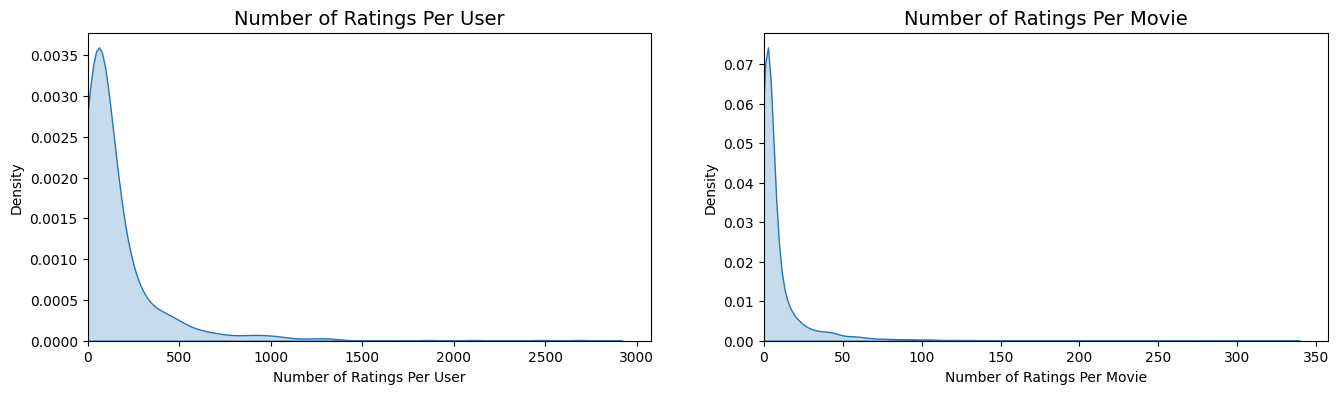

In [226]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("Number of Ratings Per User")
plt.ylabel("Density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("Number of Ratings Per Movie")
plt.ylabel("Density")
plt.show()

##11. Item - Item Recommendation with K-nearest Neighbors

In [227]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.

    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [228]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

In [229]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:\n")
for i in similar_movies:
  print(movie_titles[i])

Because you watched Toy Story (1995):

Toy Story 2 (1999)
Jurassic Park (1993)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)
Lion King, The (1994)
Star Wars: Episode VI - Return of the Jedi (1983)
Mission: Impossible (1996)
Groundhog Day (1993)


##12. Dealing with the `cold start problem`.

* `Collaborative filtering` relies solely on user-item interactions within the utility matrix. The issue with this approach is that brand new users or items with no iteractions get excluded from the recommendation system. This is called the cold start problem. Content-based filtering is a way to handle this problem by generating recommendations based on user and item features.

In [230]:
n_movies = movies['movieId'].nunique()
print(f"There are {n_movies} unique movies in this dataset.")

There are 9742 unique movies in this dataset.


In [231]:
genres = set(g for G in movies['genres'] for g in G)
for g in genres:
  movies[g] = movies.genres.transform(lambda x: int(g in x))


In [232]:
movie_genres = movies.drop(columns=['movieId','title','genres'])
movie_genres

,Animation,Thriller,Film-Noir,War,Romance,Musical,Western,Fantasy,(no genres listed),Horror,Comedy,Crime,Adventure,Sci-Fi,Mystery,Action,Children,Drama,IMAX,Documentary
0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
9738,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9740,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [233]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (9742, 9742)


In [234]:
from fuzzywuzzy import process

def movie_finder(title):
  all_titles = movies['title'].tolist()
  closest_match = process.extractOne(title,all_titles)
  return closest_match[0]

In [235]:
title = movie_finder('juminji')
title

'Jumanji (1995)'

In [236]:
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title]
print(f"Movie index for Jumanji: {idx}")

Movie index for Jumanji: 1


In [237]:
n_recommendations = 10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores,key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1: (n_recommendations+1)]
sim_scores

[(53, 1.0000000000000002),
 (109, 1.0000000000000002),
 (767, 1.0000000000000002),
 (1514, 1.0000000000000002),
 (1556, 1.0000000000000002),
 (1617, 1.0000000000000002),
 (1618, 1.0000000000000002),
 (1799, 1.0000000000000002),
 (3574, 1.0000000000000002),
 (6075, 1.0000000000000002)]

In [238]:
similar_movies = [i[0] for i in sim_scores]
similar_movies

[53, 109, 767, 1514, 1556, 1617, 1618, 1799, 3574, 6075]

`similar_movies` is an array of indices that represents Jumanji's top 10 recommendations. We can get the corresponding movie titles by either creating an inverse movie_idx mapper or using iloc on the title column of the movies dataframe.

In [239]:
print(f"Because you watched {title}:")
movies['title'].iloc[similar_movies]

Because you watched Jumanji (1995):


,title
53,"Indian in the Cupboard, The (1995)"
109,"NeverEnding Story III, The (1994)"
767,Escape to Witch Mountain (1975)
1514,Darby O'Gill and the Little People (1959)
1556,Return to Oz (1985)
1617,"NeverEnding Story, The (1984)"
1618,"NeverEnding Story II: The Next Chapter, The (1..."
1799,Santa Claus: The Movie (1985)
3574,Harry Potter and the Sorcerer's Stone (a.k.a. ...
6075,"Chronicles of Narnia: The Lion, the Witch and ..."


#** Let's put it all Together

In [245]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(movies['title'].iloc[similar_movies])

In [257]:
get_content_based_recommendations('Jumaji', 5)

Because you watched Jumanji (1995):
53             Indian in the Cupboard, The (1995)
109             NeverEnding Story III, The (1994)
767               Escape to Witch Mountain (1975)
1514    Darby O'Gill and the Little People (1959)
1556                          Return to Oz (1985)
Name: title, dtype: object


In [247]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components= 20, n_iter=10)
Q = svd.fit_transform(X.T)
Q.shape

(9724, 20)

In [253]:
# movie_id = ___________
# similar_movies = find_similar_movies(movie_id,Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
# movie_title = movie_titles[movie_id]

# print(f"Because you watched {movie_title}:")
# for i in similar_movies:
#     print(movie_titles[i])